In [18]:
'''
vectorization
multiple features
'''

'\nvectorization\nmultiple features\n'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains non-numeric values
        df[column] = df[column].replace({'yes': 1, 'no': 0, 'furnished':1,'semi-furnished':0.5,'unfurnished':0})


In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [28]:
y_train = df['price'].values

In [29]:
x_train = df.drop('price', axis=1).values

In [30]:
x_train

array([[7.42e+03, 4.00e+00, 2.00e+00, ..., 2.00e+00, 1.00e+00, 1.00e+00],
       [8.96e+03, 4.00e+00, 4.00e+00, ..., 3.00e+00, 0.00e+00, 1.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00, ..., 2.00e+00, 1.00e+00, 5.00e-01],
       ...,
       [3.62e+03, 2.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.91e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.85e+03, 3.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [31]:
y_train

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [32]:
print(x_train.shape)

(545, 12)


In [33]:
print(y_train.shape)

(545,)


In [34]:
import numpy as np

means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

normalized_x_train = (x_train - means) / stds

In [35]:
normalized_x_train

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113,  1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469,  1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469,  1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.22296203]])

In [36]:
y_mean = np.mean(y_train)
y_std = np.std(y_train)
normalized_y_train = (y_train - y_mean)/y_std

In [42]:
w = np.zeros_like(x_train[0])
b = 0

In [61]:
def compute_loss(w,b,x,y):
    loss = 0
    for i in range(0,len(x)):
        y_pred = np.dot(w,x[i]) + b
        loss += (y_pred - y[i])**2
    return loss/(2*len(x))

In [107]:
def compute_grad(w,b,x,y):
    dJ_dw = []
    dJ_db = 0
    for i in range(0,len(w)):
        dJ_dw_i = 0
        for j in range(0,len(x)):
            y_pred = np.dot(w,x[j]) + b
            dJ_dw_i +=  (y_pred-y[j])*x[j][i]
        dJ_dw.append(dJ_dw_i/len(x))

    for j in range(0,len(x)):
        y_pred = np.dot(w,x[j]) + b
        dJ_db +=  (y_pred-y[j])

    return np.array(dJ_dw),dJ_db/len(x)

In [108]:
def gradient_descent(w,b,x,y,lr,iterations):
    loss_history = []
    params = []
    for i in range(0,iterations):
        temp_loss = compute_loss(w,b,x,y)
        print("w:")
        print(w)
        print("temp_loss:")
        print(temp_loss)
        loss_history.append(temp_loss)
        dJ_dw, dJ_db = compute_grad(w,b,x,y)
        w = w - lr*dJ_dw
        b = b - lr*dJ_db
        params.append([w,b])
    return loss_history, params, w, b

In [ ]:
l_hisory, p, w_final, b_final = gradient_descent(w,b,normalized_x_train,normalized_y_train,lr=0.001,iterations=15000)

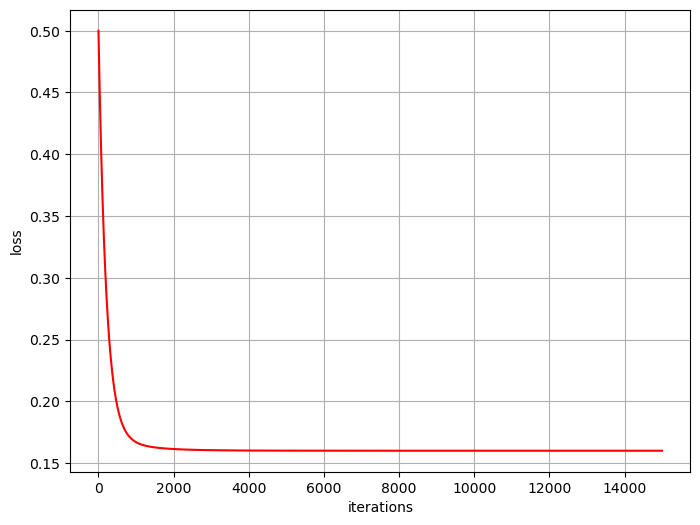

In [114]:
plt.figure(figsize=(8,6))
plt.plot(range(0,15000),l_hisory,c='r')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [120]:
x_mean = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
print(x_mean)
print(x_std)
    

[5.15054128e+03 2.96513761e+00 1.28623853e+00 1.80550459e+00
 8.58715596e-01 1.77981651e-01 3.50458716e-01 4.58715596e-02
 3.15596330e-01 6.93577982e-01 2.34862385e-01 4.65137615e-01]
[2.16814915e+03 7.37386427e-01 5.02008423e-01 8.66696233e-01
 3.48314687e-01 3.82497298e-01 4.77113618e-01 2.09206500e-01
 4.64752931e-01 8.60794942e-01 4.23912780e-01 3.80336921e-01]


In [131]:
y_pred = []
for i in range(0,len(x_train)):
    y_pred_temp = (np.dot(w_final,(x_train[i]-x_mean)/x_std) + b)
    y_pred.append((y_pred_temp*y_std) + y_mean)

In [132]:
y_pred = np.array(y_pred)

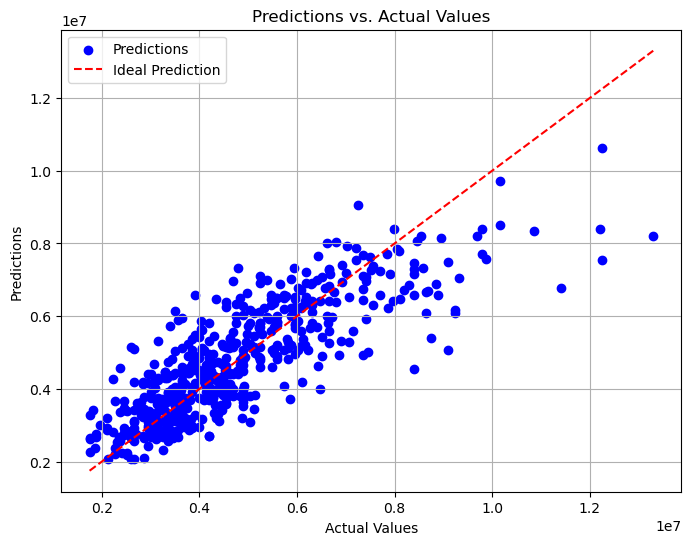

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
area = df['area'].values

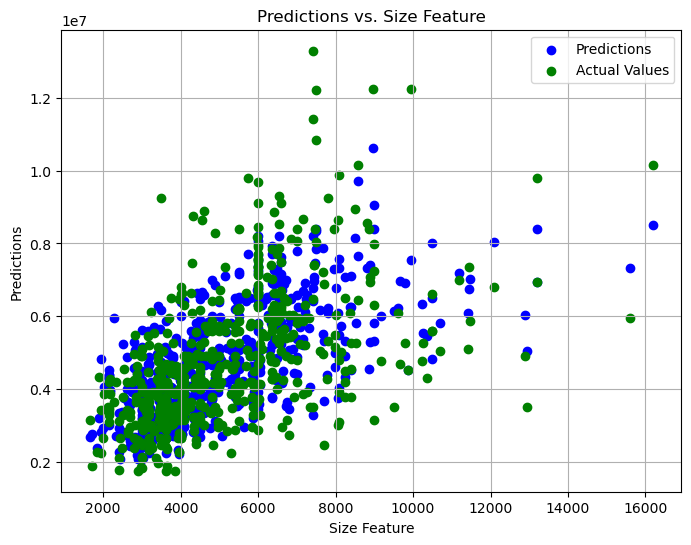

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(area, y_pred, color='b', label='Predictions')
plt.scatter(area, y_train, color='g', label='Actual Values') 
plt.xlabel('Size Feature')
plt.ylabel('Predictions')
plt.title('Predictions vs. Size Feature')
plt.grid(True)
plt.legend()
plt.show()